# **Marketing Campaign**
  
Dataset Kampanye Pemasaran berisi informasi tentang pelanggan dan respons mereka terhadap kampanye pemasaran. Data ini mencakup informasi demografis, riwayat pembelian, dan respons terhadap kampanye pemasaran sebelumnya. Berdasarkan data ini akan dibuat pengklasifikasian pelanggan kedalam beberapa kelompok untuk membantu perusahaan dalam mengenali konsumen. Pengelompokan konsumen akan sangat membantu perusahaan dalam mengenali peluang dan juga pengambilan keputusan.   
  
Sumber Data :
https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data

# **Keterangan Data**

| Kolom                 | Keterangan                                                            |
|-----------------------|-----------------------------------------------------------------------|
| AcceptedCmp1          | 1 if customer accepted the offer in the 1st campaign, 0 otherwise     | 
| AcceptedCmp2          | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise     |  
| AcceptedCmp3          | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise     |  
| AcceptedCmp4          | 1 if customer accepted the offer in the 4th campaign, 0 otherwise     |  
| AcceptedCmp5          | 1 if customer accepted the offer in the 5th campaign, 0 otherwise     |  
| Complain              | 1 if customer complained in the last 2 years                          |
| DtCustomer            | Date of customer’s enrollment with the company                        |
| Education             | Customer’s level of education                                         |
| Marital               | Customer’s marital status                                             |
| Kidhome               | Number of small children in customer’s household                      |
| Teenhome              | Number of teenagers in customer’s household                           |
| Income                | Customer’s yearly household income                                    |
| MntFishProducts       | Amount spent on fish products in the last 2 years                     |
| MntMeatProducts       | Amount spent on meat products in the last 2 years                     |
| MntFruits             | Amount spent on fruit products in the last 2 years                    |
| MntSweetProducts      | Amount spent on sweet products in the last 2 years                    |
| MntWines              | Amount spent on wine products in the last 2 years                     |
| MntGoldProds          | Amount spent on gold products in the last 2 years                     |
| NumDealsPurchases     | Number of purchases made with a discount                              |
| NumCatalogPurchases   | Number of purchases made using a catalog                              |
| NumStorePurchases     | Number of purchases made directly in stores                           |
| NumWebPurchases       | Number of purchases made through the company’s website                |
| NumWebVisitsMonth     | Number of visits to the company’s website in the last month           |
| Recency               | Number of days since the last purchase                                |
| Response (target)     | 1 if customer accepted the offer in the last campaign, 0 otherwise    |

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import random
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

C:\Users\asus\AppData\Local\Temp\ipykernel_29380\3107574069.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# **Data Loading**

In [2]:
'''Load data dari csv'''
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

#display seluruh kolom pada data
pd.set_option('display.max_columns', None) 

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **Data Cleaning**

In [3]:
'''Informasi data'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Terdapat 28 kolom dengan total 2240 baris data dimana kolom-kolom tersebut terdiri dari 3 kolom bertipe Object dan sisanya bertipe Integer. Terdapat missing value pada kolom Income yang perlu penanganan lebih lanjut. Jumlah data yang hilang tidak mencapai 10% dari total data sehingga penanganan yang akan dilakukan adalah dengan menghapus baris data yang terkait dengan missing value tersebut. Kolom Dt_Customer masih bertipe Object dan perlu diubah ke datetime karena kolom tersebut adalah tanggal.

In [4]:
'''Menghapus baris data missing values'''

# copy data
data = df.copy()

data = data.dropna()

In [5]:
'''Mengubah kolom Dt_Customer menjadi format tanggal'''

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [6]:
'''Cek apakah ada missing values'''

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [7]:
# info data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
'''Drop kolom yang tidak dipakai'''

# drop dikarenakan kolom tidak berpengaruh pada data
data = data.drop(['ID','Z_CostContact','Z_Revenue'],axis=1)

# karena income tertinggi di sangat jauh (outlier) dari rata-ratanya maka akan di kurangi hanya data yang mendekati rata-rata saja yang digunakan 
data = data[(data["Income"]<600000)]

# **Feature Engineering**

In [9]:
'''Menambahkan fitur'''

# menghitung usia pelanggan
def calculate_age(year_birth):
    current_year = datetime.datetime.now().year
    age = current_year - year_birth
    return age


# Menghitung usia untuk setiap baris dan menambah kolom baru
data['Age'] = data['Year_Birth'].apply(calculate_age)

#Menghapus data pelanggan yang berusia lebih dari 80 tahun, karena ada pelanggan yang berusia lebih dari 100 tahun sehingga perlu dibersihkan 
data = data[(data["Age"]<81)]



# Membuat bin untuk kelompok usia
bins = [0, 20, 30, 40, 50, 60, 70, 80]  # Sesuaikan bin sesuai kebutuhan Anda
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,60-69
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,70-79
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,50-59
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,40-49
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,40-49


In [10]:
'''Penambahan fitur untuk pelanggan'''

# Menghitung lamanya menjadi pelanggan
def calculate_customer_duration(enrollment_date):
    today = datetime.datetime.today()
    duration = (today - enrollment_date).days
    return duration

# Menghitung lama menjadi pelanggan untuk setiap baris dan menambah kolom baru
data['Customer_For_Days'] = data['Dt_Customer'].apply(calculate_customer_duration)

# Menambahkan kolom satuan tahun agar data lebih mudah dipahami
data['Customer_For_Years'] = data['Customer_For_Days'] / 365.25

# Menghapus kolom Dt_Customer karena sudah mengetahui lamanya seorang pelanggan menjadi langganan
data.drop('Dt_Customer', axis=1, inplace=True)


data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Customer_For_Days,Customer_For_Years
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,60-69,4301,11.775496
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,70-79,3751,10.269678
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,50-59,3950,10.814511
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40,40-49,3777,10.340862
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43,40-49,3799,10.401095


In [11]:
'''Penambahan fitur untuk pengeluaran'''

#Total spendings on various items
data['Total Spent'] = data['MntWines']+ data['MntFruits']+ data['MntMeatProducts']+ data['MntFishProducts']+ data['MntSweetProducts']+ data['MntGoldProds']

product = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

# drop kolom yang sudah tidak dipakai
data.drop(columns=product)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Age_Group,Customer_For_Days,Customer_For_Years,Total Spent
0,1957,Graduation,Single,58138.0,0,0,58,3,8,10,4,7,0,0,0,0,0,0,1,67,60-69,4301,11.775496,1617
1,1954,Graduation,Single,46344.0,1,1,38,2,1,1,2,5,0,0,0,0,0,0,0,70,70-79,3751,10.269678,27
2,1965,Graduation,Together,71613.0,0,0,26,1,8,2,10,4,0,0,0,0,0,0,0,59,50-59,3950,10.814511,776
3,1984,Graduation,Together,26646.0,1,0,26,2,2,0,4,6,0,0,0,0,0,0,0,40,40-49,3777,10.340862,53
4,1981,PhD,Married,58293.0,1,0,94,5,5,3,6,5,0,0,0,0,0,0,0,43,40-49,3799,10.401095,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,2,9,3,4,5,0,0,0,0,0,0,0,57,50-59,4019,11.003422,1341
2236,1946,PhD,Together,64014.0,2,1,56,7,8,2,5,7,0,0,0,1,0,0,0,78,70-79,3657,10.012320,444
2237,1981,Graduation,Divorced,56981.0,0,0,91,1,2,3,13,6,0,1,0,0,0,0,0,43,40-49,3793,10.384668,1241
2238,1956,Master,Together,69245.0,0,1,8,2,6,5,10,3,0,0,0,0,0,0,0,68,60-69,3794,10.387406,843


In [12]:
'''Penambahan fitur untuk keluarga'''

# Menambahkan jumlah anak yang dimiliki oleh pelanggan spendings on various items
data['Children'] = data['Kidhome']+ data['Teenhome']

# Menambahkan jumlah orang dirumah pelanggan
marital_status_mapping = {
    'Married': 2, 
    'Together': 2, 
    'Absurd': 1, 
    'Widow': 1, 
    'YOLO': 1, 
    'Divorced': 1, 
    'Single': 1,
    'Alone': 1
}

# Mengubah Marital_Status sesuai mapping dan menghitung Living_With
data['Living_With'] = data['Marital_Status'].replace(marital_status_mapping).astype(int) + data['Children']


In [13]:
#cek tipe data per kolom
num_cols = list(data.select_dtypes(exclude=['object','category']).columns)
cat_cols = list(data.select_dtypes(include=['object','category']).columns)

print("Numerical Columns:",num_cols)
print("Categorical Columns:",cat_cols)

Numerical Columns: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_For_Days', 'Customer_For_Years', 'Total Spent', 'Children', 'Living_With']
Categorical Columns: ['Education', 'Marital_Status', 'Age_Group']


In [14]:
# Cek NaN pada data
data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Age_Group              7
Customer_For_Days      0
Customer_For_Years     0
Total Spent            0
Children               0
Living_With            0
dtype: int64

In [15]:
#Drop data yang hilang

data = data.dropna()
data.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Age_Group              0
Customer_For_Days      0
Customer_For_Years     0
Total Spent            0
Children               0
Living_With            0
dtype: int64

In [16]:
'''Label Encoding untuk data kategorikal'''

data2 = data.copy()
LE=LabelEncoder()
for i in cat_cols:
    data2[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [17]:
'''Melakukan scaling pada data'''

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data2),columns= data.columns)

In [18]:
'''Mengecek jumlah baris pada masing-masing data'''
print("Jumlah baris dalam data:", data.shape[0])
print("Jumlah baris dalam data3:", scaled_data.shape[0])

Jumlah baris dalam data: 2197
Jumlah baris dalam data3: 2197


In [19]:
'''mengecek apakah ada data yang tidak sesuai'''
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2197 non-null   float64
 1   Education            2197 non-null   float64
 2   Marital_Status       2197 non-null   float64
 3   Income               2197 non-null   float64
 4   Kidhome              2197 non-null   float64
 5   Teenhome             2197 non-null   float64
 6   Recency              2197 non-null   float64
 7   MntWines             2197 non-null   float64
 8   MntFruits            2197 non-null   float64
 9   MntMeatProducts      2197 non-null   float64
 10  MntFishProducts      2197 non-null   float64
 11  MntSweetProducts     2197 non-null   float64
 12  MntGoldProds         2197 non-null   float64
 13  NumDealsPurchases    2197 non-null   float64
 14  NumWebPurchases      2197 non-null   float64
 15  NumCatalogPurchases  2197 non-null   f

In [20]:
'''Melakukan PCA pada data'''
pca = PCA(n_components=3)
PCA_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=(["col1","col2", "col3"]))

# **Clustering**

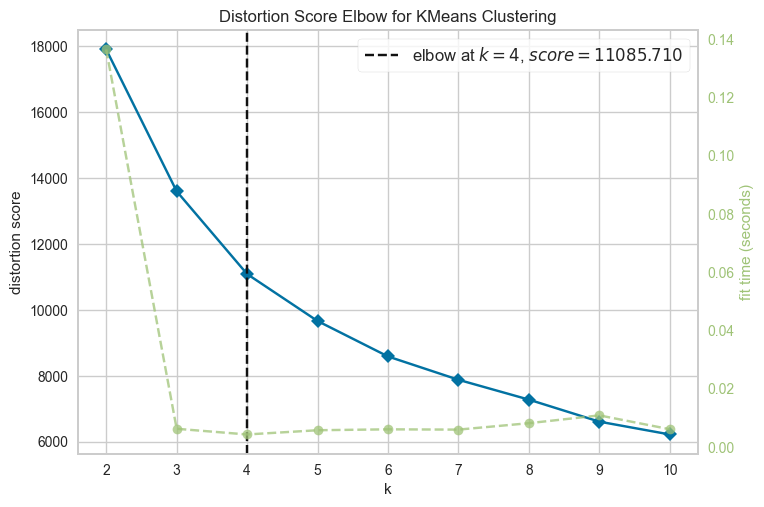

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
'''Kalkulasi Elbow Method untuk menentukan jumlah cluster'''

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_data)
Elbow_M.show()

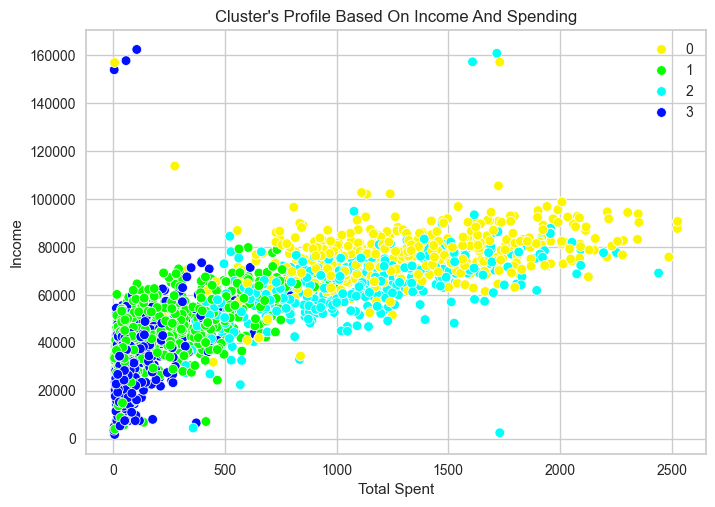

In [22]:
'''Eksekusi Clustering'''

AC = AgglomerativeClustering(n_clusters=4)
data_AC = AC.fit_predict(PCA_data)
PCA_data["Clusters"] = data_AC

# Menambahkan 'Clusters' ke data asli
data["Clusters"]= data_AC

palette = sns.color_palette("hsv", n_colors=5)
pl = sns.scatterplot(data = data,x=data["Total Spent"], y=data["Income"],hue=data["Clusters"], palette=palette )
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs Spending**
* Cluster 0: Pengeluaran tinggi dengan pendapatan tinggi
* Cluster 1: Pengeluaran menengah dengan pendapatan menengah
* Cluster 2: Pengeluaran tinggi dengan pendapatan menengah 
* Cluster 3: Pengeluaran rendah dengan pendapatan rendah

Jumlah Pelanggan Per Cluster: 
Clusters
0    496
1    639
2    413
3    649
Name: count, dtype: int64


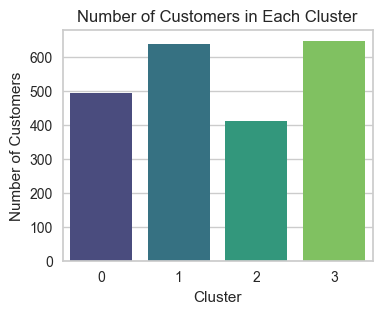

In [23]:
# Menghitung jumlah pelanggan di setiap cluster
cluster_counts = data['Clusters'].value_counts().sort_index()
print('Jumlah Pelanggan Per Cluster: ')
print(cluster_counts)
# Membuat bar plot
plt.figure(figsize=(4, 3))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

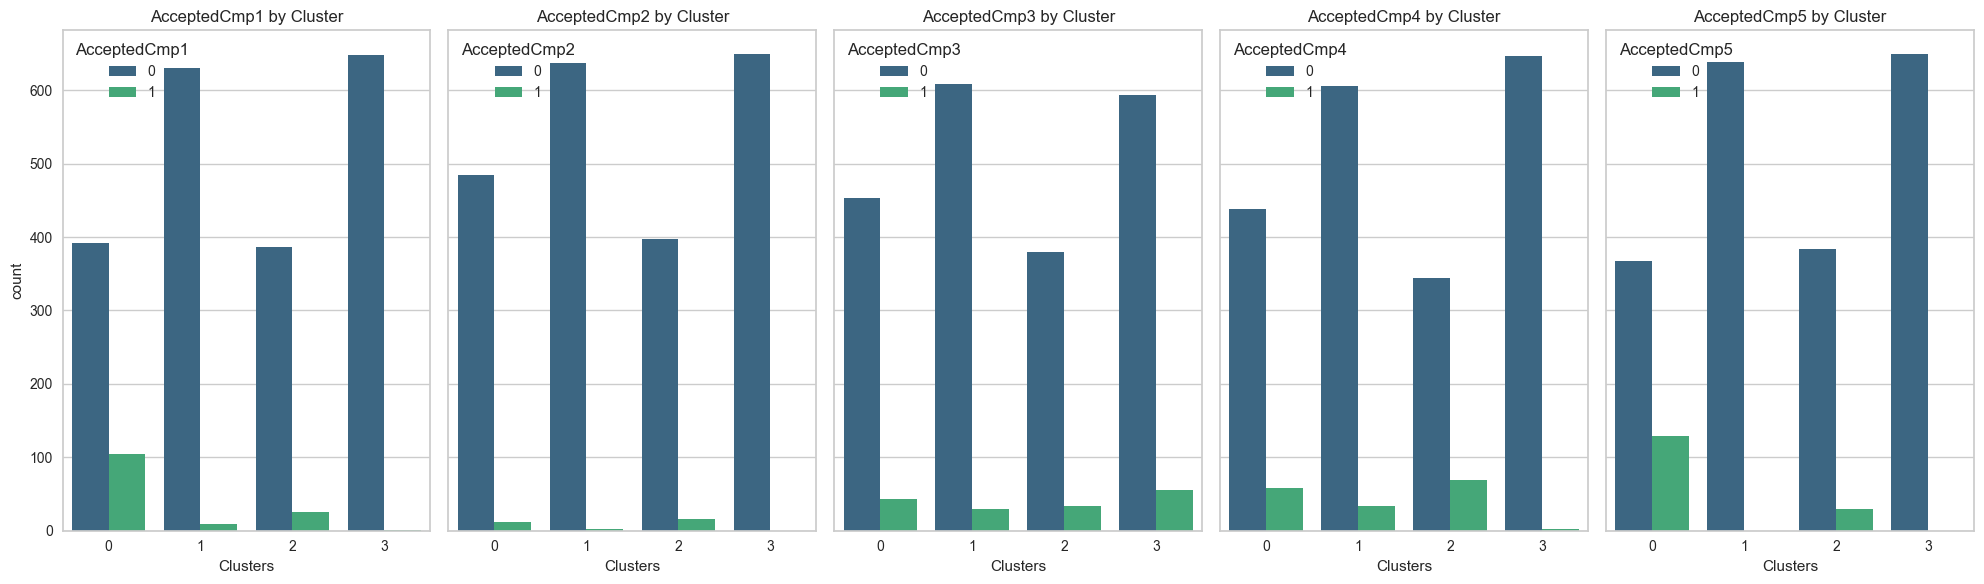

In [24]:
'''Membuat Clustering berdasarkan gelombang kampanye yang diterima'''

accepted_cmp_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), sharey=True)

for i, col in enumerate(accepted_cmp_columns):
    sns.countplot(data=data, x='Clusters', hue=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} by Cluster')
    axes[i].legend(title=col, loc='upper left')

plt.tight_layout()
plt.show()

0 = kampanye di tolak  
1 = kampanye di terima

Grafik diatas menggambarkan respon dari masing-masing cluster setelah menerima beberapa gelombang kampanye yang diberikan tim marketing.  
Kampanye ke 1 dan ke 5 didominasi oleh respon positif dari cluster 0. Secara garis besar cluster ini selalu merespon dalam tiap gelombang kampanye, namun paling tinggi di kampanya ke 1 dan ke 5. Kampanye gelombang ke 2 adalah kampanye yang memiliki respon positif paling sedikit dari total cluster. Cluster 3 memiliki respon positif paling sedikit dari antara cluster lainnya.
  
Beberapa hal yang mungkin bisa diperhatikan :
* Pelanggan pada Cluster 0 (pendapatan tinggi dan pengeluaran tinggi) memberi respon hampir di setiap gelombang kampanye meskipun distribusinya tidak merata
* Jeda waktu antar kampanye bisa lebih diperhatikan, apakah hal ini mempengaruhi turn rate dari kampanye
* Media yang digunakan untuk menjangkau pelanggan juga perlu diperhatikan, apakah melalui telpon, email atau media sosial

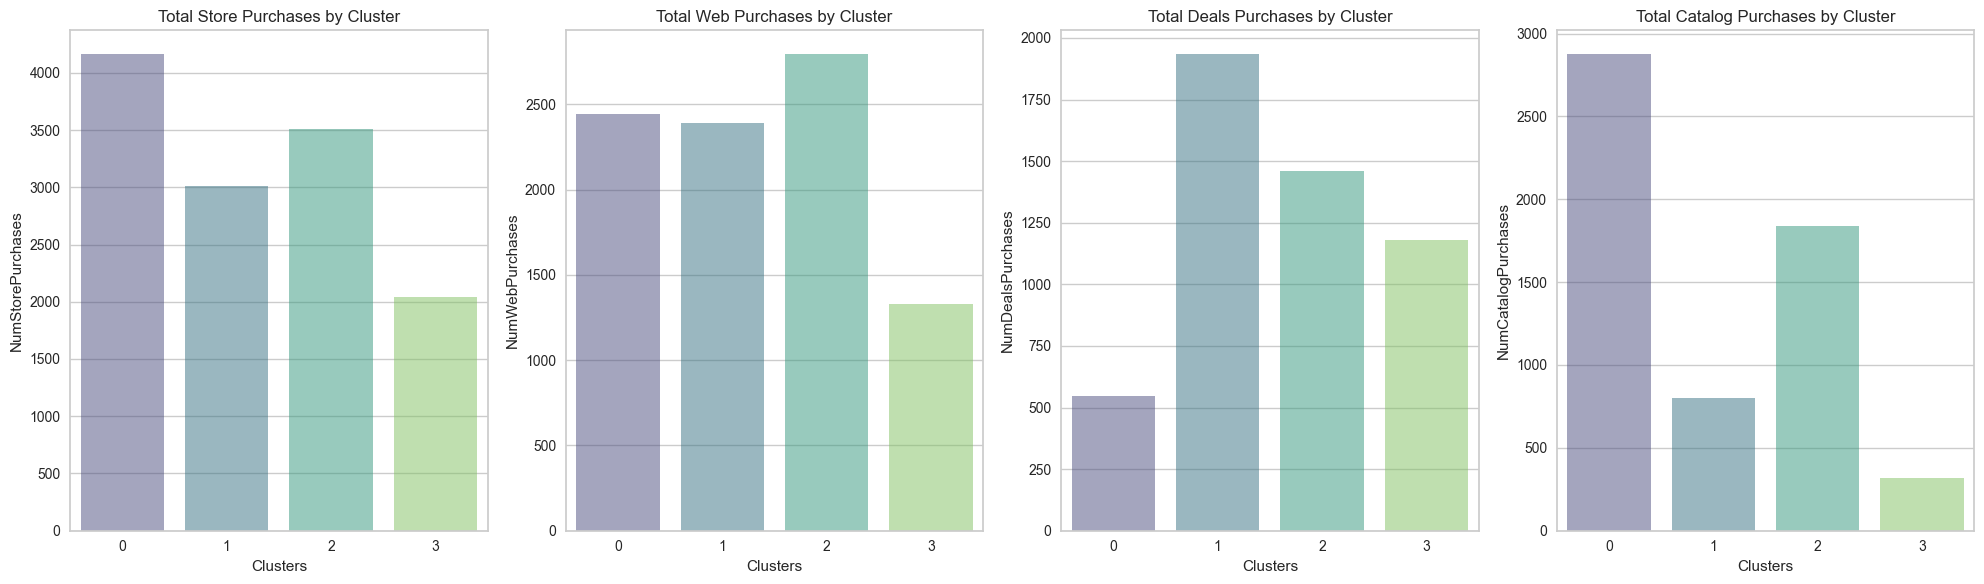

In [25]:
'''Membuat clustering berdasarkan tipe transaksi'''

numeric_cols = ['NumStorePurchases', 'NumWebPurchases', 'NumDealsPurchases', 'NumCatalogPurchases']

# Menghitung total (sum) dari masing-masing kategori berdasarkan cluster
sum_data = data.groupby("Clusters")[numeric_cols].sum().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

sns.barplot(ax=axes[0], x=sum_data["Clusters"], y=sum_data["NumStorePurchases"], palette='viridis', alpha=0.5)
axes[0].set_title('Total Store Purchases by Cluster')

sns.barplot(ax=axes[1], x=sum_data["Clusters"], y=sum_data["NumWebPurchases"], palette='viridis', alpha=0.5)
axes[1].set_title('Total Web Purchases by Cluster')

sns.barplot(ax=axes[2], x=sum_data["Clusters"], y=sum_data["NumDealsPurchases"], palette='viridis', alpha=0.5)
axes[2].set_title('Total Deals Purchases by Cluster')

sns.barplot(ax=axes[3], x=sum_data["Clusters"], y=sum_data["NumCatalogPurchases"], palette='viridis', alpha=0.5)
axes[3].set_title('Total Catalog Purchases by Cluster')

# Menampilkan plot
plt.tight_layout()
plt.show()


**Purchase Type vs Clusters**

**Pembelian Offline (Toko Fisik)**  
Urutan jumlah transaksi terbanyak = 0, 2, 1, 3  
  
**Pembelian Online (Toko Online)**  
Urutan jumlah transaksi terbanyak = 2, 0, 1, 3

**Pembelian Menggunakan Diskon**  
Urutan jumlah transaksi terbanyak = 1, 2, 3, 0

**Pembelian Menggunakan Katalog**  
Urutan jumlah transaksi terbanyak = 0, 2, 1, 3

Keempat grafik ini menunjukkan bahwa cluster 4 yang bertipe pendapatan tinggi dengan pengeluaran tinggi memiliki angka transaksi paling kecil dalam dalam transaksi menggunakan diskon dibandingkan dengan cluster lainnya, dengan kata lain mereka tidak bergantung dengan diskon. Kemungkinan hal ini disebabkan oleh pendapatan yang tinggi sehingga mereka tidak perlu banyak berpikir ketika akan melakukan transaksi. Cluster ini juga melakukan pembelian paling tinggi melalui katalog. Hal ini mengindikasikan bahwa cluster ini lebih memperhatikan detail barang yang akan dibeli dengan melihat katalog barang sebelum membeli.
  
Cluster 1 melakukan transaksi terbanyak dengan diskon, disusul oleh cluster 2 dan 3. Cluster-cluster ini adalah cluster yang bertipe pendapatan  menengah hingga rendah, mereka cenderung lebih menyukai bertransaksi dengan diskon. Kampanye yang mungkin dilakukan untuk cluster tipe ini adalah yang berfokus pada potongan harga atau diskon. Kampanye bertipe diskon pada cluster 0 yang bertipe pendapatan tinggi kemungkinan akan kurang efektif dikarenakan jumlahnya yang sedikit, sehingga bisa dipertimbangkan memberikan kampanye lain seperti hadiah liburan atau barang kepada mereka yang melakukan transaksi terbanyak.

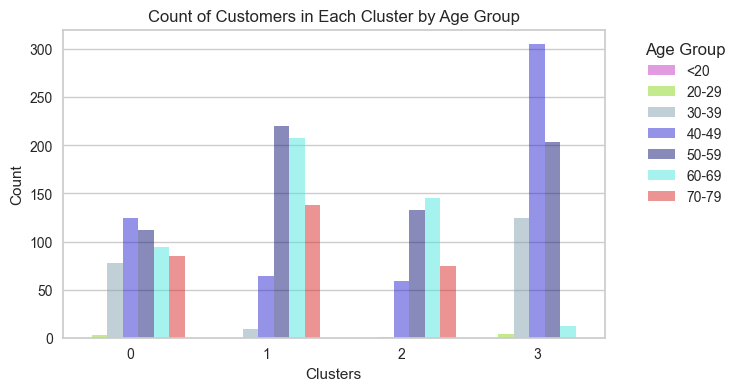

In [26]:
'''Membuat clustering berdasarkan kelompok usia'''

age_palette = sns.color_palette(["#DB24DB", "#8DF800", "#7CA5B8", "#100CEE", "#020887", "#33FFF5", "#F80A0A"])

plt.figure(figsize=(7, 4))
pl = sns.countplot(x=data["Clusters"], hue=data["Age_Group"], palette=age_palette, alpha=0.5)
plt.title('Count of Customers in Each Cluster by Age Group')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Age Group vs Clusters**
* Cluster 0: Pengeluaran tinggi dengan pendapatan tinggi  
  Didominasi oleh pelanggan yang berusia >40 tahun
* Cluster 1: Pengeluaran menengah dengan pendapatan menengah  
  Didominasi oleh pelanggan usia >50 tahun
* Cluster 2: Pengeluaran menengah dengan pendapatan menengah  
  Paling banyak diisi oleh pelanggan dengan rentang usia 40-49 dan 60-69 tahun 
* Cluster 3: Pengeluaran menengah dengan pendapatan tinggi  
  Paling banyak diisi oleh pelanggan berusia 40-59 dan 50-59 tahun

Proporsi cluster berdasarkan rentang usia ini menunjukkan beberapa hal seperti :
* Usia rata-rata dari pelanggan yang dimiliki oleh perusahaan adalah usia lanjut
* Pelanggan dengan usia senja (>70 tahun) tidak ada yang berpendapatan rendah
* Proporsi pelanggan muda (<39 tahun) sangat kecil dibandingkan rentang usia lainnya

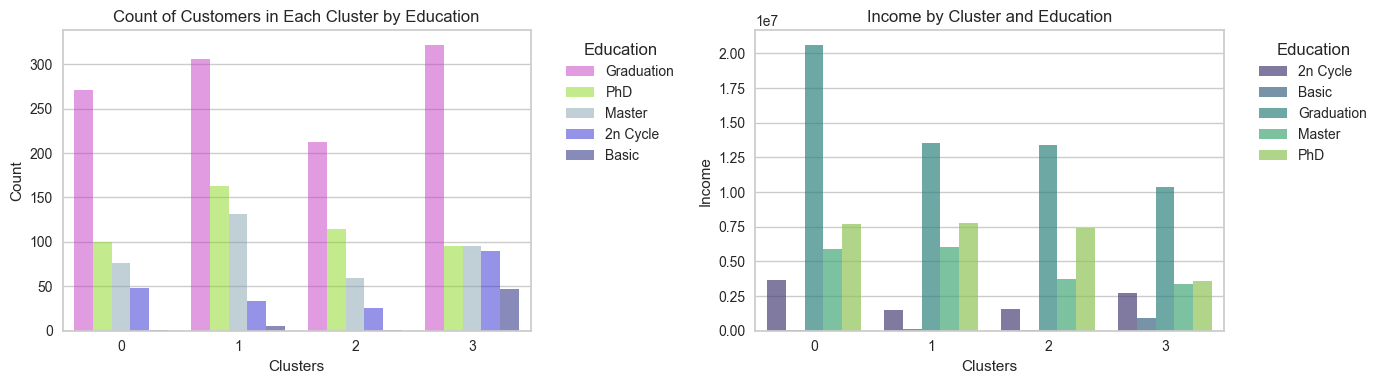

In [27]:
'''Membuat clustering berdasarkan jenjang pendidikan'''

edu_palette = sns.color_palette(["#DB24DB", "#8DF800", "#7CA5B8", "#100CEE", "#020887", "#33FFF5", "#F80A0A"])

sum_data = data.groupby(["Clusters", "Education"])["Income"].sum().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(ax=axes[0], x=data["Clusters"], hue=data["Education"], palette=edu_palette, alpha=0.5)
axes[0].set_title('Count of Customers in Each Cluster by Education')
axes[0].set_xlabel('Clusters')
axes[0].set_ylabel('Count')
axes[0].legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.barplot(ax=axes[1], x="Clusters", y="Income", hue="Education", data=sum_data, palette="viridis", alpha=0.7)
axes[1].set_title('Income by Cluster and Education')
axes[1].set_xlabel('Clusters')
axes[1].set_ylabel('Income')
axes[1].legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Education vs Total Spent vs Clusters**
  
Terdapat tipe pendidikan berupa 2n cycle, untuk data ini tidak diketahui secara pasti maksudnya apakah setara dengan master atau tidak. Berdasarkan beberapa sumber, dikatakan bahwa 2n cycle merujuk pada sebuah tahapan pendidikan dari Bologna Process dimana 2n Cycle berarti setara dengan Master dan Bologna Process sendiri berlaku di negara-negara eropa. Karena kurangnya informasi dari data tersebut, maka diambil kesimpulan bahwa 2n cycle adalah mereka yang memiliki tingkat pendidikan setara Master namun menempuh pendidikannya di negara-negara eropa (diasumsikan bahwa data ini diambil bukan di negara eropa).

Tingkat pendidikan sarjana mendominasi seluruh cluster dimana jumlah pendapatannya adalah yang tertinggi dari semua tingkat pendidikan. Mereka yang setingkat Master dan PhD juga tersebar diseluruh cluster. Hal yang menarik adalah meskipun tingkat pendidikan para pelanggan tinggi namun mereka memiliki pendapatan yang beragam bahkan ada mereka yang berpendidikan tinggi namun berpendapatan rendah, seperti yang terlihat di cluster 3. Pelanggan yang berpendidikan dasar juga proporsinya sangat rendah dibandingkan tingkat pendidikan lainnya.

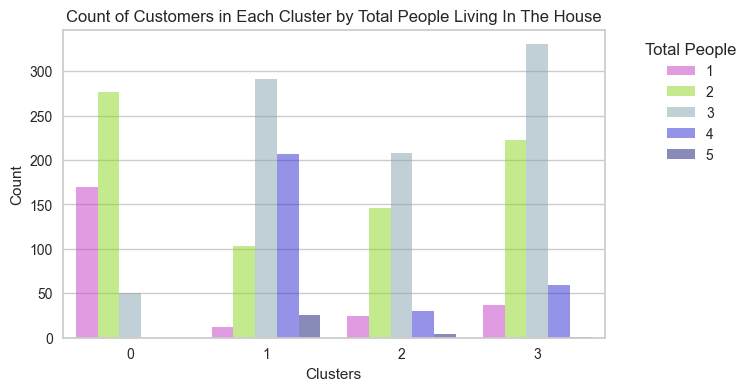

In [28]:
fam_palette = sns.color_palette(["#DB24DB", "#8DF800", "#7CA5B8", "#100CEE", "#020887", "#33FFF5", "#F80A0A"])

plt.figure(figsize=(7, 4))
pl = sns.countplot(x=data["Clusters"], hue=data["Living_With"], palette=fam_palette, alpha=0.5)
plt.title('Count of Customers in Each Cluster by Total People Living In The House')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(title='Total People', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**People Living In The House vs Cluster**

Keterangan :  
1 = Tinggal sendiri  
2 = Tinggal hanya dengan pasangan  
3 - 5 = Orang tua yang tinggal dengan anak (min 1 anak, maks 3 anak)  

* Cluster 0 kebanyakan tinggal sendiri atau hanya berdua dengan pasangan
* Cluster 1 didominasi oleh mereka yang tinggal dengan pasangan dan sudah punya anak
* Cluster 2 didominasi oleh mereka yang merupakan orang tua dengan satu anak dan disusul oleh yang hanya tinggal berdua dengan pasangannya
* Cluster 3 didominasi oleh mereka yang merupakan orang tua dengan anak dan disusul oleh pasangan yang tidak memiliki anak

# **Kesimpulan**
---  
  
Berdasarkan profiling yang sudah dilakukan dengan memisahkan data kedalam beberapa cluster maka didapatkan hasil sebagai berikut :

**Cluster 0**
* Cluster ini memiliki income besar dengan total pengeluaran juga besar
* Paling banyak memberikan respon positif dalam setiap kali gelombang kampanye
* Tidak peduli dengan diskon, Transaksi via toko, web dan katalog
* Pelanggan berusia lanjut, dengan proporsi lebih rendah mereka yang <40 tahun
* Berpendidikan tinggi
* Kebanyakan tidak memiliki anak

**Cluster 1**
* Cluster ini meiliki income menengah dengan pengeluaran juga menengah
* Kurang baik dalam menerima kampanye per gelombangnya
* Sangat menyukai diskon, transaksi via web dan toko
* Pelanggan berusia lanjut
* Berpendidikan tinggi
* Kebanyakan orang tua yang memiliki anak

**Cluster 2**
* Cluster ini memiliki income menengah dengan pengeluaran tinggi
* Cukup baik dalam menerima kampanye per gelombangnya
* Menyukai diskon, transaksi via toko, web dan katalog
* Pelanggan berusia lanjut
* Berpendidikan tinggi
* Kebanyakan orang tua yang memiliki anak

**Cluster 3**
* Cluster ini memiliki income rendah dengan pengeluaran rendah
* Paling buruk dalam memberikan respon terhadap kampanye
* Menyukai diskon, transaksi via toko dan web
* Pelanggan dengan usia lanjut, dengan proporsi lebih rendah mereka yang <40 tahun
* Berpendidikan tinggi namun yang paling banyak memiliki pelanggan dengan pendidikan dasar
* kebanyakan orang tua yang memiliki anak